In [1]:
import sys
sys.path.append("..")
import pprint
pp = pprint.PrettyPrinter(indent=4)
from cavsim2d.cavity import Cavity, Cavities

cavs = Cavities()
cavs.save(project_folder='D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

# define geometry parameters
n_cells = 2
midcell = [42, 42, 12, 19, 35, 57.7, 103.353]  # <- A, B, a, b, Ri, L, Req
endcell_l = [40.34, 40.34, 10, 13.5, 39, 55.716, 103.353]
endcell_r = [42, 42, 9, 12.8, 39, 56.815, 103.353]

# create cavity
tesla = Cavity(n_cells, midcell, endcell_l,endcell_r, beampipe='none')
cavs.add_cavity([tesla], names=['TESLA'], plot_labels=['TESLA'])

op_points = {
            "Z": {
                "freq [MHz]": 400.79,  # Operating frequency
                "E [GeV]": 45.6,  # <- Beam energy
                "I0 [mA]": 1280,  # <- Beam current
                "V [GV]": 0.12,  # <- Total voltage
                "Eacc [MV/m]": 5.72,  # <- Accelerating field
                "nu_s []": 0.0370,  # <- Synchrotron oscillation tune
                "alpha_p [1e-5]": 2.85,  # <- Momentum compaction factor
                "tau_z [ms]": 354.91,  # <- Longitudinal damping time
                "tau_xy [ms]": 709.82,  # <- Transverse damping time
                "f_rev [kHz]": 3.07,  # <- Revolution frequency
                "beta_xy [m]": 56,  # <- Beta function
                "N_c []": 56,  # <- Number of cavities
                "T [K]": 4.5,  # <- Operating tempereature
                "sigma_SR [mm]": 4.32,  # <- Bunch length
                "sigma_BS [mm]": 15.2,  # <- Bunch length
                "Nb [1e11]": 2.76  # <- Bunch population
            }
}

wakefield_config = {
    'bunch_length': 25,
    'wakelength': 50,
    'processes': 2,
    'rerun': True,
    'operating_points': op_points,
    # 'uq_config': {
    #     'variables': ['A'],
    #     # 'objectives': ["freq [MHz]", "R/Q [Ohm]", "Epk/Eacc []", "Bpk/Eacc [mT/MV/m]", "G [Ohm]", "kcc [%]", "ff [%]"],
    #     'objectives': [["ZL", [1, 2, 5]], ["ZT", [2, 3, 4]]],
    #     # 'objectives': ["ZL"],
    #     'delta': [0.05],
    #     'processes': 4,
    #     'distribution': 'gaussian',
    #     # 'method': ['QMC', 'LHS', 1000],
    #     # 'method': ['QMC', 'Sobol', 1000],
    #     # 'method': ['Qudrature', 'Gaussian', 1000],
    #     'method': ['Quadrature', 'Stroud3'],
    #     # 'method': ['Quadrature', 'Stroud5'],
    #     # 'gaussian': ['Quadrature', 'Gaussian'],
    #     # 'from file': ['<file path>', columns],
    #     'cell_type': 'mid-cell',
    #     'cell complexity': 'simplecell'
    #     }
}
cavs.run_wakefield(wakefield_config)
pp.pprint(cavs.wakefield_qois)

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.
{   'TESLA': {   'Z_BS_15.2mm': {   'I0 [mA]': 1280.0,
                                    'Nb [1e11]': 2.76,
                                    'P_HOM [kW]': 9.555992124052215,
                                    'R/Q [Ohm]': 219.24633413899738,
                                    'k_FM [V/pC]': 0.3771526613717502,
                                    'n cell': 2,
                                    'sigma_z [mm]': 15.2,
                                    '|k_kick| [V/pC/m]': 10.64,
                                    '|k_loss| [V/pC]': 0.546},
                 'Z_SR_4.32mm': {   'I0 [mA]': 1280.0,
                                    'Nb [1e11]': 2.76,
                                    'P_HOM [kW]': 41.45272408251023,
                                    'R/Q [Ohm]': 219.24633413899738,
                                    'k_FM [V/pC]': 0.44156091367988576,
                

{'$k_\\parallel$': <Axes: label='$k_\\parallel$', ylabel='$k_\\parallel$'>,
 '$k_\\perp$': <Axes: label='$k_\\perp$', ylabel='$k_\\perp$'>,
 '$p_\\mathrm{HOM}/cav$': <Axes: label='$p_\\mathrm{HOM}/cav$', ylabel='$p_\\mathrm{HOM}/cav$'>}

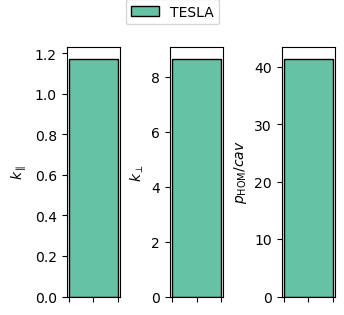

In [2]:
cavs.plot_compare_hom_bar('Z_SR_4.32mm')